EXPLORATORY DATA ANALYSIS

In [221]:
#!pip install pandas scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # or RandomForestRegressor for regression
from sklearn.metrics import accuracy_score  # or mean_squared_error for regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [222]:
#read in dataset
df = pd.read_csv('/Users/karukavina/Documents/VSCODEFiles/ML/ML-Final-Project/student-mat.csv', sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [223]:
#shows us the basic statistics
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [224]:
#shows us variable data types
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

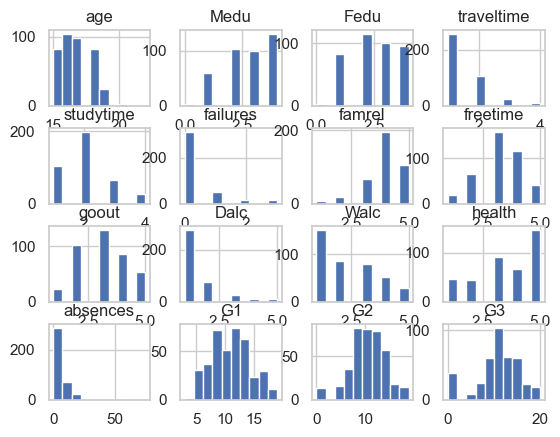

In [225]:
#tiny histograms of each feature, distribution understanding
df.hist()
plt.show()

In [226]:
#G3 sorted correlation table before data cleaning
corr_sorted = df.corr(numeric_only=True)[['G3']].sort_values(by='G3', ascending=False)

In [227]:
corr_sorted

,G3
G3,1.000000
G2,0.904868
G1,0.801468
Medu,0.217147
Fedu,0.152457
studytime,0.097820
famrel,0.051363
absences,0.034247
freetime,0.011307
Walc,-0.051939


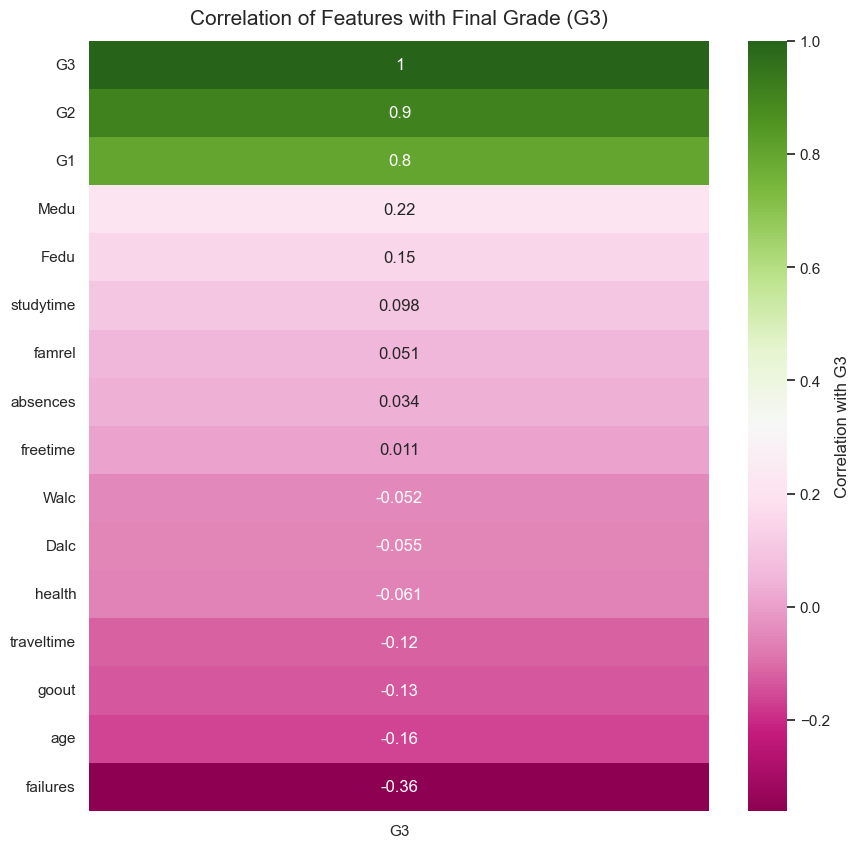

In [228]:
#plotting heatmap of sorted correlation table
plt.figure(figsize=(10, 10))
sns.heatmap(corr_sorted, annot=True, cmap='PiYG', cbar_kws={'label': 'Correlation with G3'}) #showing corr values-true, color bar label 
plt.title('Correlation of Features with Final Grade (G3)', fontsize=15, pad=12)
plt.show()

In [229]:
import warnings
warnings.filterwarnings("ignore")

In [230]:
#selecting numerical columns only
numerical_cols = df.select_dtypes(include='number').columns.tolist()

In [231]:
#change formatting to allow for plotting by feature
formatted_df = df[numerical_cols].melt(var_name='Feature', value_name='Value')

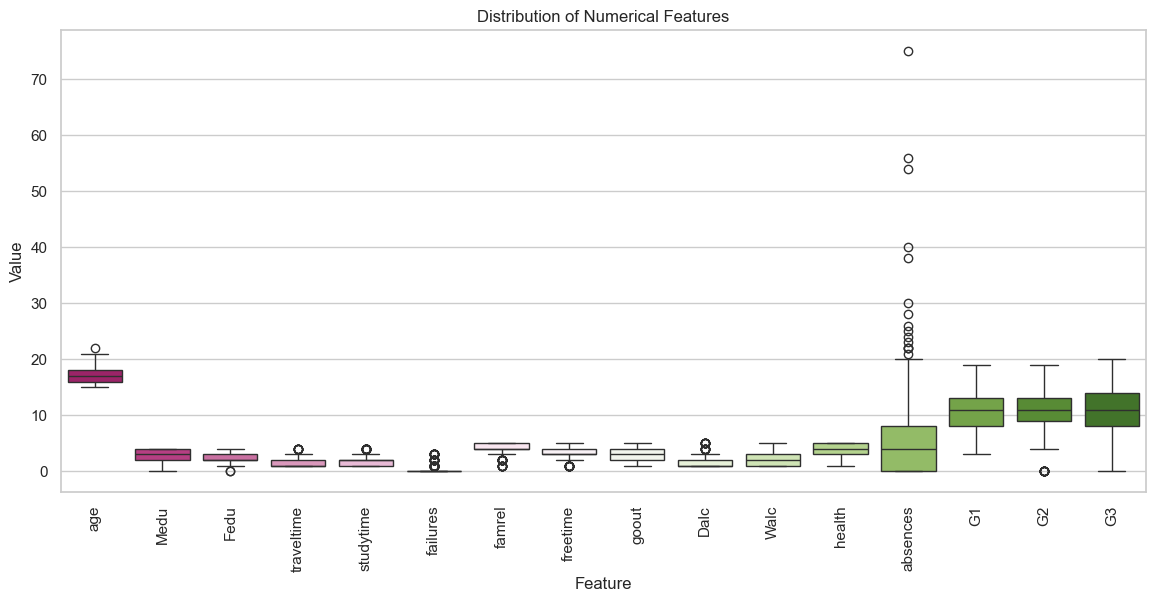

In [232]:
#plotting feature distribution boxplots on same plot
plt.figure(figsize=(14, 6)) 
sns.boxplot(data=formatted_df, x='Feature', y='Value', palette='PiYG')
plt.xticks(rotation=90)
plt.title('Distribution of Numerical Features')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.show()


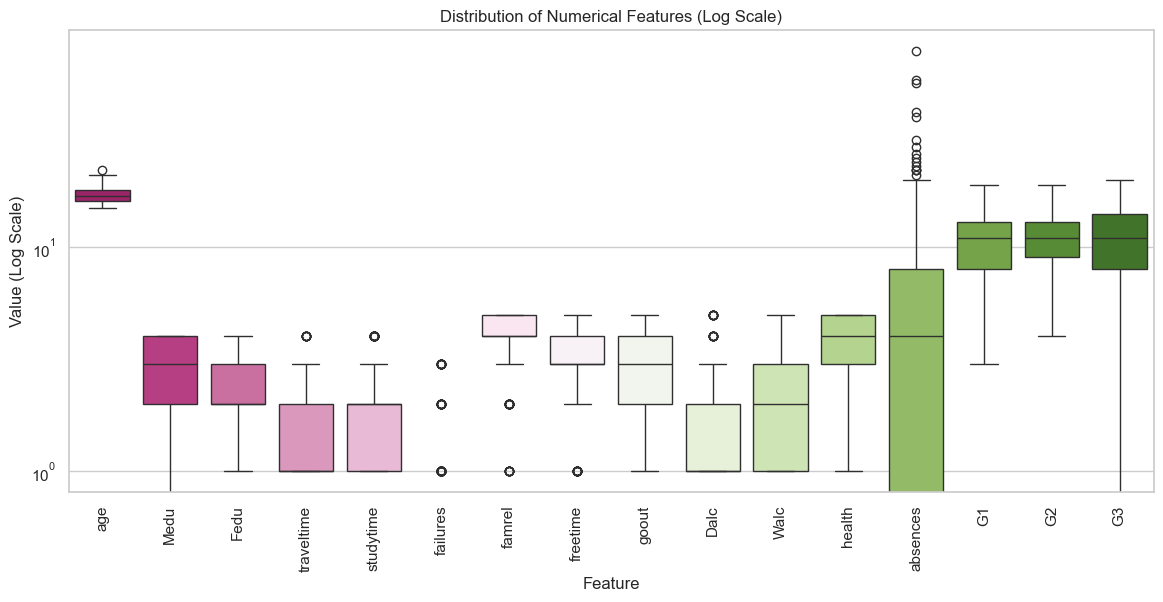

In [234]:
#plotting feature distribution boxplots on same plot- log scale version in order to see distribution differences better
#easier to see skewed data/outliers
plt.figure(figsize=(14, 6))
sns.boxplot(data=formatted_df, x='Feature', y='Value', palette='PiYG')
plt.yscale('log') #change to log scale
plt.xticks(rotation=90)
plt.title('Distribution of Numerical Features (Log Scale)')
plt.xlabel('Feature')
plt.ylabel('Value (Log Scale)')
plt.show()
